# TM10007 Group Assignment Machine Learning
#### Sara Arman, Judith Essenburg, George Franssen, Naomi Verkerk

## Google colab environment

In [174]:
# Run this to use from colab environment
#!pip install -q --upgrade git+https://github.com/naomiverkerk/TM10007.git

## Import


In [1]:
# General packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import seaborn


# Classifiers
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection 
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import svm

In [280]:
from load_data import load_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl

## Loading Data

In [2]:
data = load_data() 
x_full = x_full = data.iloc[0:167, 0:724]
y_full = data.label

NameError: name 'load_data' is not defined

In [ ]:
# Checken of div weggehaald is
# data = data.replace('#DIV/0!', np.nan)
# data2 = data.iloc[155:158, 7:9]
# data2

## Describing Data

The number of samples/patients: 167
The number of columns/features: 725
Number of GBM:  102
Number of LGG:  65


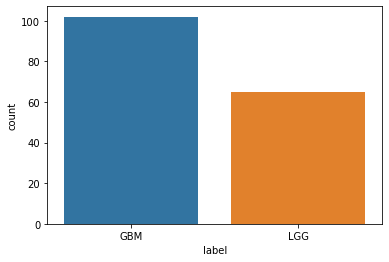

In [299]:
print(f'The number of samples/patients: {len(data.index)}') #rows
print(f'The number of columns/features: {len(data.columns)}') #columns

ax = sns.countplot(y,label="Count")     
warnings.warn("ignore")
GBM, LGG = y_full.value_counts()
print('Number of GBM: ',GBM)
print('Number of LGG: ',LGG)

## Splitting in train and test data

In [180]:
# the code to split, after that we inspect the data

## Checking/exploring the dataset

In [289]:
data.dtypes == 'object'
# Seperate numerical variables and categorical variables
num_vars = data.columns[data.dtypes != 'object']
cat_vars = data.columns[data.dtypes == 'object']

print(len(num_vars))
print(len(cat_vars))
print(cat_vars)



724
1
Index(['label'], dtype='object')


In [291]:
GBM = data[data.label == 'GBM']
LGG = data[data.label == 'LGG']

In [184]:
# # to check which features have most missing values
# missing_values = data[num_vars].isnull().sum().sort_values(ascending=False)
# missing_values_multiple = (missing_values > 0).sum()

# print(missing_values)
# print(f'The total number of features with 1 or more missing values is {missing_values_multiple}')



In [301]:
# saving missing values in a variable
a = pd.isna(data).sum()/len(data)*100

# saving column names in a variable
variables = data.columns

# new variable to store variables having missing values less than a threshold

variable = [ ]

for i in range(data.columns.shape[0]):
    if a[i]<=40: #setting the threshold as 40%
        variable.append(variables[i])

variable   

# creating a new dataframe using the above variables
data = data[variable]

# percentage of missing values in each variable of new data
p = pd.isna(data).sum()/len(data)*100


In [386]:
p3 = p[p>0]

p3

VOLUME_ET_OVER_ED                     0.598802
VOLUME_NET_OVER_ED                    0.598802
INTENSITY_Mean_ET_T1Gd               11.976048
INTENSITY_STD_ET_T1Gd                11.976048
INTENSITY_Mean_ET_T1                 11.976048
                                       ...    
TEXTURE_NGTDM_ED_FLAIR_Coarseness     0.598802
TEXTURE_NGTDM_ED_FLAIR_Contrast       0.598802
TEXTURE_NGTDM_ED_FLAIR_Busyness       0.598802
TEXTURE_NGTDM_ED_FLAIR_Complexity     0.598802
TEXTURE_NGTDM_ED_FLAIR_Strength       0.598802
Length: 446, dtype: float64

In [459]:
k = data.apply(lambda x: x.count(), axis=1)

k2 = k[k<705]

print(len(k2))


a3 = k2/data.shape[1]*100
a3 

21


ID
TCGA-CS-4944    68.510638
TCGA-CS-5397    68.510638
TCGA-CS-6665    68.510638
TCGA-CS-6666    68.510638
TCGA-CS-6669    68.510638
TCGA-DU-5874    68.510638
TCGA-DU-7008    68.510638
TCGA-DU-7019    68.510638
TCGA-DU-7299    68.510638
TCGA-DU-8162    68.510638
TCGA-DU-8164    68.510638
TCGA-DU-8166    68.510638
TCGA-DU-A5TS    68.510638
TCGA-DU-A5TU    68.510638
TCGA-FG-6691    68.510638
TCGA-FG-7634    68.510638
TCGA-HT-7602    68.510638
TCGA-HT-7686    68.226950
TCGA-HT-7879    68.510638
TCGA-HT-7884    68.510638
TCGA-HT-A61A    68.510638
dtype: float64

In [430]:
# g = {'a': [1,2,3], 'b': [4,5,6]}
# g = pd.DataFrame(g)

# index = g.index
# condition = g["a"] == 3
# indec = index[condition]
# indec

Int64Index([2], dtype='int64')

In [451]:
c = data.iloc[:,:].isin([np.inf, -np.inf]).sum()
c2 = c[c>0]

c2.index[0]

'DIST_Vent_ED'

In [457]:
# Finding data point with inf
infinite = data.iloc[:,:].isin([np.inf, -np.inf]).sum()
col_inf = infinite[infinite>0]

index_inf = data.index
condition_inf = data[col_inf.index[0]].isin([np.inf, -np.inf])
row_inf = index_inf[condition_inf][0]

row_inf

'TCGA-HT-7686'

In [307]:
data_columns_name = data.columns


In [188]:
total_upper = []
total_lower = []
len_out = 167

for i in range(0,len_out):
    Q1 = np.percentile(data[data_columns_name[i]], 25, interpolation = 'midpoint')
    Q3 = np.percentile(data[data_columns_name[i]], 75, interpolation = 'midpoint')

    IQR = Q3 - Q1

    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    upper_list = data[data_columns_name[i]] >= (Q3+1.5*IQR)
        
    # Below Lower bound
    lower_list = data[data_columns_name[i]] <= (Q1-1.5*IQR)
    
    total_upper.append(upper_list.sum())
    total_lower.append(lower_list.sum())

    upper_list_values = data[data_columns_name[i]][upper_list]
    lower_list_values = data[data_columns_name[i]][lower_list]



In [308]:
Id = list(data.index)

df = {  'ID': Id[0:len_out],
        'Upper outliers':  total_upper,
        'Lower outliers': total_lower,

        }

df = pd.DataFrame(df)
df['Total'] = df['Upper outliers'] + df['Lower outliers']

df = pd.DataFrame(df)


In [309]:
for i in range(0, len(y_full)):
    if y_full[i] == "GBM":
        y_full[i] = 1
    else:
        y_full[i] = 0

In [310]:
distributions = []

for i in range(0,100):
    features = [x_full.columns[i], x_full.columns[i+1]]
    features_idx = [data.columns.get_loc(feature) for feature in features]
    X = x_full.iloc[:, features_idx]
    distributions.append((features, X))

In [311]:
from sklearn.preprocessing import minmax_scale
from matplotlib import cm

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)

In [312]:
def create_axes(title, figsize=(8, 4)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )

In [313]:
def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X.iloc[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X.iloc[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

In [314]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=title[0],
        x1_label=title[1],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X.iloc[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X.iloc[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=title[0],
        x1_label=title[1],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )

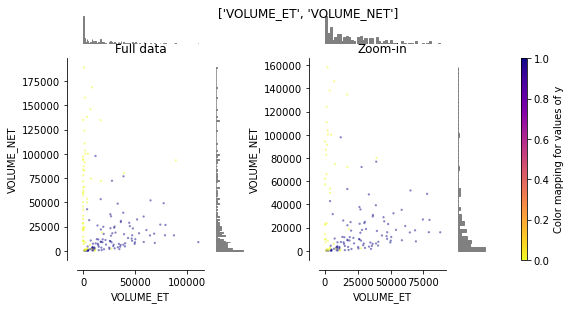

In [315]:
make_plot(0)

## Missing Data 

In [335]:
p.loc(p>0)

TypeError: unhashable type: 'Series'

In [340]:
missing_value = p[p>0]
print(missing_value)
index = missing_value.index
print(index)


VOLUME_ET_OVER_ED                     0.598802
VOLUME_NET_OVER_ED                    0.598802
INTENSITY_Mean_ET_T1Gd               11.976048
INTENSITY_STD_ET_T1Gd                11.976048
INTENSITY_Mean_ET_T1                 11.976048
                                       ...    
TEXTURE_NGTDM_ED_FLAIR_Coarseness     0.598802
TEXTURE_NGTDM_ED_FLAIR_Contrast       0.598802
TEXTURE_NGTDM_ED_FLAIR_Busyness       0.598802
TEXTURE_NGTDM_ED_FLAIR_Complexity     0.598802
TEXTURE_NGTDM_ED_FLAIR_Strength       0.598802
Length: 446, dtype: float64
Index(['VOLUME_ET_OVER_ED', 'VOLUME_NET_OVER_ED', 'INTENSITY_Mean_ET_T1Gd',
       'INTENSITY_STD_ET_T1Gd', 'INTENSITY_Mean_ET_T1', 'INTENSITY_STD_ET_T1',
       'INTENSITY_Mean_ET_T2', 'INTENSITY_STD_ET_T2',
       'INTENSITY_Mean_ET_FLAIR', 'INTENSITY_STD_ET_FLAIR',
       ...
       'TEXTURE_NGTDM_ED_T2_Coarseness', 'TEXTURE_NGTDM_ED_T2_Contrast',
       'TEXTURE_NGTDM_ED_T2_Busyness', 'TEXTURE_NGTDM_ED_T2_Complexity',
       'TEXTURE_NGTDM_ED_T2_S

In [328]:
pd.DataFrame(p)

with open('percentage.txt', 'a') as f:
    percentage = p.to_string(header=False, index=False)
    f.write(percentage)
    f.close()

## Splitting

In [460]:
import warnings
# Create a 20 fold stratified CV iterator
cv_20fold = model_selection.StratifiedKFold(n_splits=10)
results = []
best_n_neighbors = []

# Loop over the folds
for validation_index, test_index in cv_20fold.split(X2, y2):
    # Split the data properly
    X_validation = X2[validation_index]
    y_validation = y2[validation_index]
   
    X_test = X2[test_index]
    y_test = y2[test_index]
    
    

NameError: name 'model_selection' is not defined

## Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## Clasiffier

In [ ]:
parameters = {"n_neighbors": list(range(1, 12, 2))}
    knn = neighbors.KNeighborsClassifier()
    cv_10fold = model_selection.StratifiedKFold(n_splits=5)
    grid_search = model_selection.GridSearchCV(knn, parameters, cv=cv_10fold, scoring='roc_auc')
    grid_search.fit(X_validation, y_validation)

    # Get resulting classifier
    clf = grid_search.best_estimator_
    print(f'Best classifier: k={clf.n_neighbors}')
    best_n_neighbors.append(clf.n_neighbors)
    
    # Test the classifier on the test data
    probabilities = clf.predict_proba(X_test)
    scores = probabilities[:, 1]
    
    # Get the auc
    auc = metrics.roc_auc_score(y_test, scores)
    results.append({
        'auc': auc,
        'k': clf.n_neighbors,
        'set': 'test'
    })
    
    # Test the classifier on the validation data
    probabilities_validation = clf.predict_proba(X_validation)
    scores_validation = probabilities_validation[:, 1]
    
    # Get the auc
    auc_validation = metrics.roc_auc_score(y_validation, scores_validation)
    results.append({
        'auc': auc_validation,
        'k': clf.n_neighbors,
        'set': 'validation'
    })
    
# Create results dataframe and plot it
results = pd.DataFrame(results)
seaborn.boxplot(y='auc', x='set', data=results)

optimal_n = int(np.median(best_n_neighbors))
print(f"The optimal N={optimal_n}")